In [48]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize,  LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical 

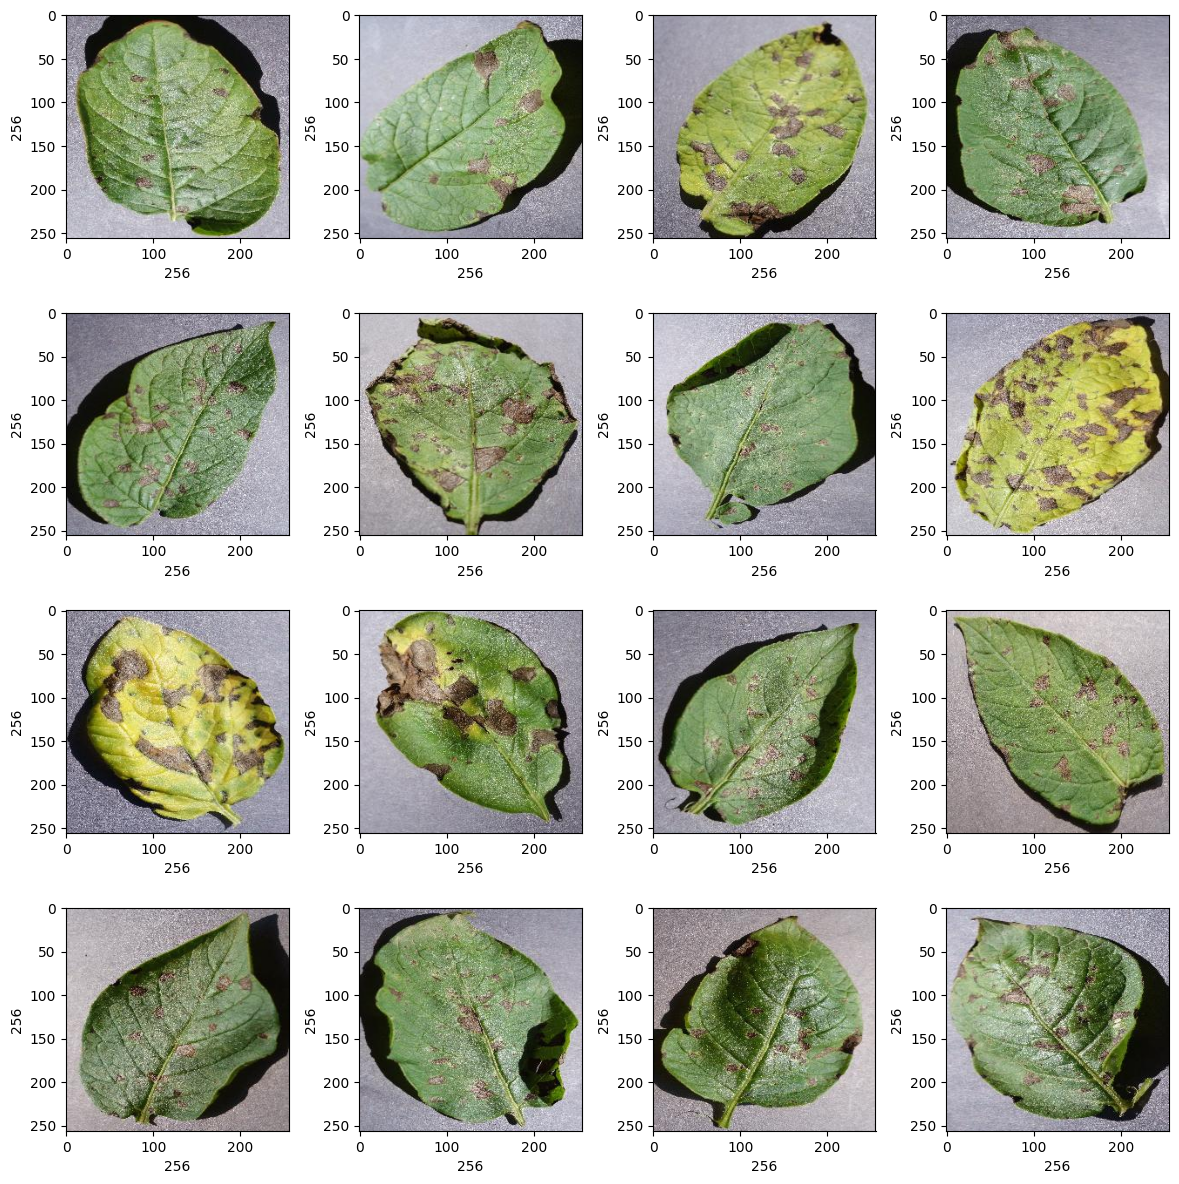

In [49]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = "C:/Users/Sayandeep Mondal/solo_pjcts/plant_disease_detection/plant_data/Potato___Early_blight"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

In [50]:
#Converting Images to array 
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256,256))  
            #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [52]:
dir = "C:/Users/Sayandeep Mondal/solo_pjcts/plant_disease_detection/plant_data"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bacterial_spot']
binary_labels = [0,1,2]
temp = -1

# Reading and converting image to numpy array
for directory in root_dir:
    plant_image_list = listdir(f"{dir}/{directory}")
    temp += 1
    for files in plant_image_list:
        image_path = f"{dir}/{directory}/{files}"
        image_list.append(convert_image_to_array(image_path))
        label_list.append(binary_labels[temp])

In [53]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

0    300
1    300
2    300
Name: count, dtype: int64

In [54]:
image_list[0].shape

(256, 256, 3)

In [55]:
label_list = np.array(label_list)
label_list.shape

(900,)

In [56]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10) 

In [57]:
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape( -1, 256,256,3)
x_test = x_test.reshape( -1, 256,256,3)

In [58]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [59]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()

c:\Users\Sayandeep Mondal\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 85, 85, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 85, 85, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 42, 42, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 28224)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │       225,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 231,347 (903.70 KB)

 Trainable params: 231,347 (903.70 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

In [61]:
# Splitting the training data set into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [62]:
# Training the model
epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_val, y_val))

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 800ms/step - accuracy: 0.3091 - loss: 1.0947 - val_accuracy: 0.2917 - val_loss: 1.0646
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 704ms/step - accuracy: 0.3387 - loss: 1.0391 - val_accuracy: 0.2917 - val_loss: 1.0257
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 704ms/step - accuracy: 0.3654 - loss: 0.9853 - val_accuracy: 0.2917 - val_loss: 0.9721
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 704ms/step - accuracy: 0.3726 - loss: 0.9345 - val_accuracy: 0.6806 - val_loss: 0.8934
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 699ms/step - accuracy: 0.7601 - loss: 0.8583 - val_accuracy: 0.9028 - val_loss: 0.8091
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 684ms/step - accuracy: 0.9339 - loss: 0.7849 - val_accuracy: 0.9653 - val_loss: 0.7213
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 682ms/step - accuracy: 0.9654 - loss: 0.7002 - val_accuracy: 0.9653 - val_loss: 0.6371
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 680ms/step - accuracy: 0.9626 - loss: 0.6223 - val_accuracy: 0.9722 - val_loss:

In [65]:
model.save("C:/Users/Sayandeep Mondal/solo_pjcts/plant_disease_detection/plant_disease.keras")
# serialize model to json
json_model = model.to_json()
#save the model architecture to JSON file
with open('C:/Users/Sayandeep Mondal/solo_pjcts/plant_disease_detection/plant_disease_model.json', 'w') as json_file:
    json_file.write(json_model)
#saving the weights of the model
model.save_weights('C:/Users/Sayandeep Mondal/solo_pjcts/plant_disease_detection/plant_disease_model_weights.weights.h5')

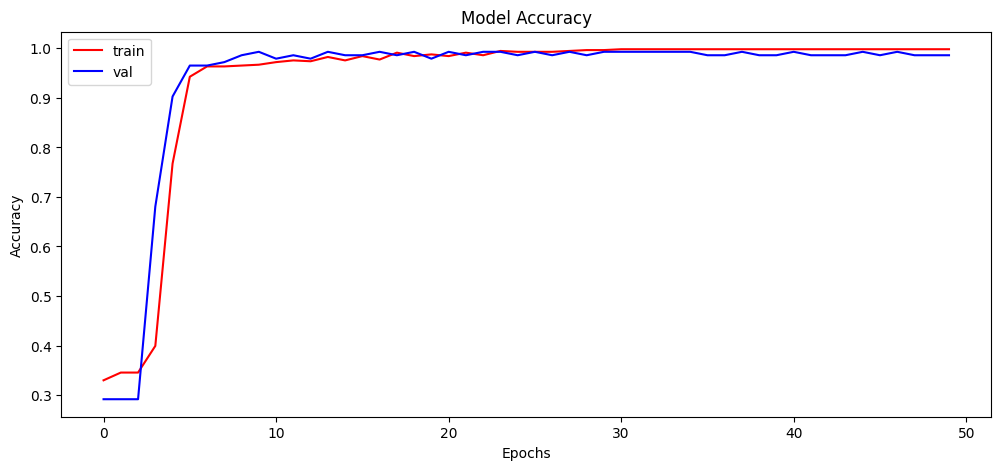

In [66]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [68]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 1.0000 - loss: 0.0233
Test Accuracy: 100.0


In [69]:
y_pred = model.predict(x_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step


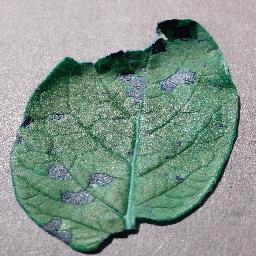

In [70]:
# Plotting image to compare
img = array_to_img(x_test[10])
img

In [71]:
# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",all_labels[np.argmax(y_test[10])])
print("Predicted : ",all_labels[np.argmax(y_pred[10])])

Originally :  Potato-Early_blight
Predicted :  Potato-Early_blight
